In [10]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../data/model/processedData.csv')

X = data.drop(['Team1', 'Team2', 'Team1Win', 'Year', 'ROUND'], axis=1)
y = data['Team1Win']
print(X.columns)


Index(['TP', 'OP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'DRB', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg',
       'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       '+-', 'SEED', 'SRS'],
      dtype='object')


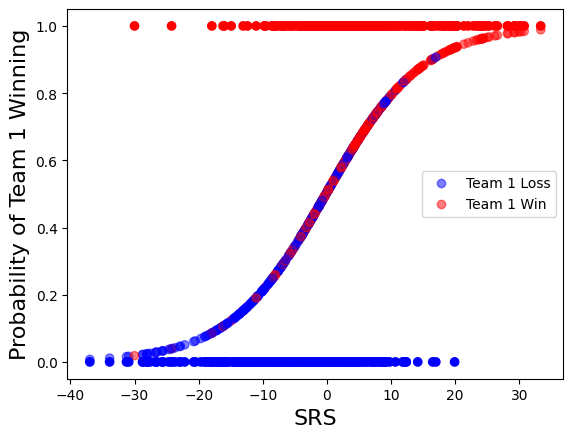

In [62]:

model = LogisticRegression() # Replace with your desired model

model.fit(np.array(X['SRS']).reshape(-1, 1), y)

scatter = plt.scatter(X['SRS'], model.predict_proba(np.array(X['SRS']).reshape(-1, 1))[:,1], c=y, cmap='bwr', alpha=0.5)
plt.scatter(X['SRS'], y, c=y, cmap='bwr')
plt.xlabel('SRS', fontsize=16)
plt.ylabel('Probability of Team 1 Winning', fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['Team 1 Loss', 'Team 1 Win'])
plt.savefig('SRS.png', dpi=300, bbox_inches='tight')
plt.show()


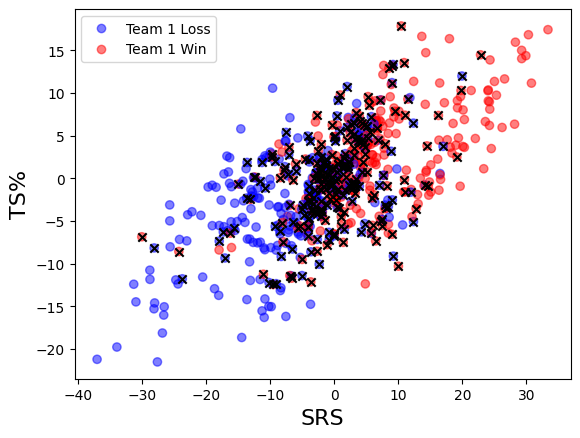

In [10]:

model = SVC(kernel='rbf', C=1E10)

model.fit(X[['SRS', '+-']], y)

scatter = plt.scatter(X['SRS'], X['+-'], c=y, cmap='bwr', alpha=0.5)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c='black', marker='x')
plt.xlabel('SRS', fontsize=16)
plt.ylabel('TS%', fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['Team 1 Loss', 'Team 1 Win'])
plt.savefig('SRS.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
mini = 9999
for j in range(len(X.columns)):
    model = SVC(kernel='linear', C=1E10)
    model.fit(X[['SRS', X.columns[j]]], y)
    if len(model.support_vectors_) < mini:
        mini = len(model.support_vectors_)

print(mini)


/home/karlob/miniconda3/envs/zavrsni/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


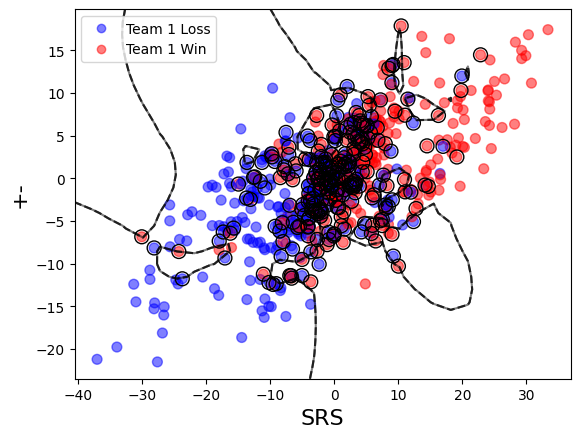

In [11]:
ax = plt.gca()
plt.scatter(X['SRS'], X['+-'], c=y, s=50, cmap='bwr', alpha=0.5)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('SRS', fontsize=16)
plt.ylabel('+-', fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['Team 1 Loss', 'Team 1 Win'])
plt.savefig('SRS.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
model = xgb.XGBClassifier()

model.fit(np.array(X['SRS']).reshape(-1, 1), y)

fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(model)
plt.savefig('XGB.png', dpi=300, bbox_inches='tight')
plt.show()


/home/karlob/miniconda3/envs/zavrsni/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


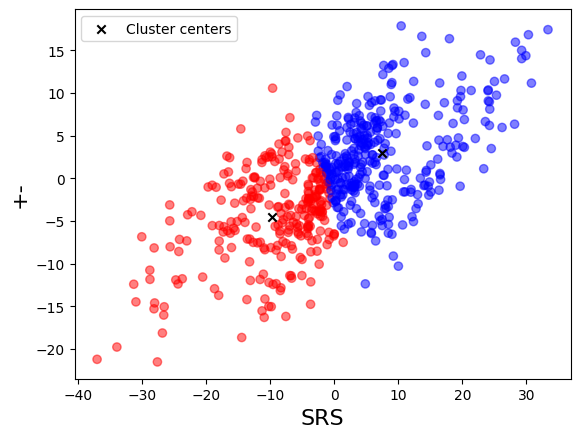

In [22]:
model = KMeans(n_clusters=2)

model.fit(X[['SRS', '+-']])

plt.scatter(X['SRS'], X['+-'], c=model.labels_, cmap='bwr', alpha=0.5)
scatter = plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='black', marker='x', label='Cluster centers')
plt.xlabel('SRS', fontsize=16)
plt.ylabel('+-', fontsize=16)
plt.legend()
plt.savefig('KMeans.png', dpi=300, bbox_inches='tight')
plt.show()